# Albumentations

## 1. Image augmentations
## 2. How to use Albumentations

### Deep neural networks need a lot of training data in order to produce good results and prevent overfitting.

### However, obtaining training data is often difficult and sometimes even impossible. 

### In image classification tasks, each image in the training data needs to be labeled.

### In object detection tasks, bounding boxes need to be drawn on each object in the images of the training data.

### Sometimes, access to images is blocked by laws or is expensive.

## Image Augmentation
Image augmentation is a way to create new training images from existing ones. This is done by creating slight modifications of the original image.

<img src="https://albumentations.ai/docs/images/introduction/image_augmentation/augmentation.jpg" width=70% height=70% al>

### - Increases the training data
### - Lowers data overfitting
### - Improved performance of the model

## Albumentations is a Python library for fast and flexible image augmentations. 
- A single interface to work with images, masks, bounding boxes, and key points.
- Battle tested
- High performance
- Diverse set of supported augmentations
- Extensibility
- Rigorous testing
- It is open source and MIT licensed

## Installation

In [179]:
pip install -U albumentations matplotlib

Requirement already up-to-date: albumentations in /home/jhgalino/.local/lib/python3.8/site-packages (1.2.1)
Requirement already up-to-date: matplotlib in /home/jhgalino/.local/lib/python3.8/site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


## Image Augmentation

There are usually 4 steps in image augmentation using Albumentations.

1. Import albumentations and a library to read images from the disk (e.g., OpenCV).
2. Define an augmentation pipeline.
3. Read images from the disk.
4. Pass images to the augmentation pipeline and receive augmented images.


## Step 1: Import `albumentations` and a library to read images from the disk (e.g., OpenCV)

In [180]:
import albumentations as A
import cv2

## Step 2: Define an augmentation pipeline
The augmentation pipeline will determine the augmentations to be performed on an image. To create an augmentation pipeline, we need to create an instance of the `Compose` class and pass a list of augmentations.

In [181]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256), # crop a random 256x256 image
    A.HorizontalFlip(p=0.5), # flip the image horizontally with probability of 50%
    A.RandomBrightnessContrast(p=0.2), # change the brightness and contrast of image with probability of 20%
])

## Step 3: Read images from the disk.
Using OpenCV, read an image from the disk. The usage of `cv2.cvtColor` is due to the fact that OpenCV opens images in BGR format instead of RGB, so we need to convert it to RGB. We will also create a convenience function using matplotlib to show the image. This function was taken from [here](https://albumentations.ai/docs/examples/example/#Define-the-visualization-function).

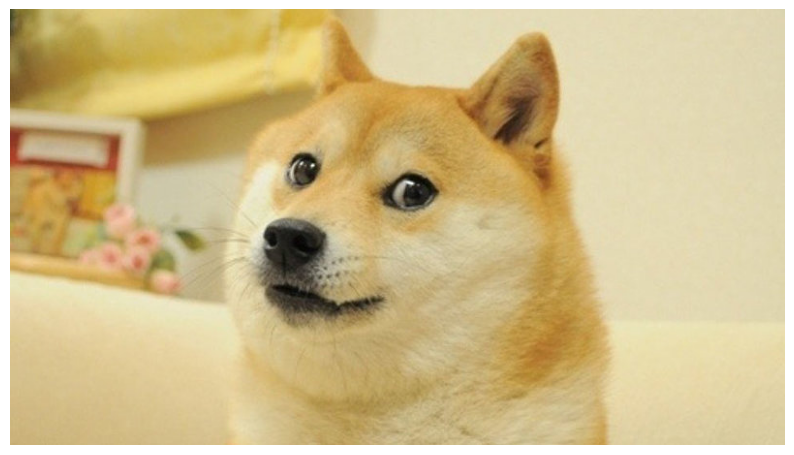

In [182]:
from matplotlib import pyplot as plt

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

image = cv2.imread("doge.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

## Step 4: Pass images to the augmentation pipeline and receive augmented images
To get the augmented image, we pass the image read by OpenCV to the augmentation pipeline built earlier. The `transform` function will return a dictionary with a single key: `image`. The `image`key will contain the image.

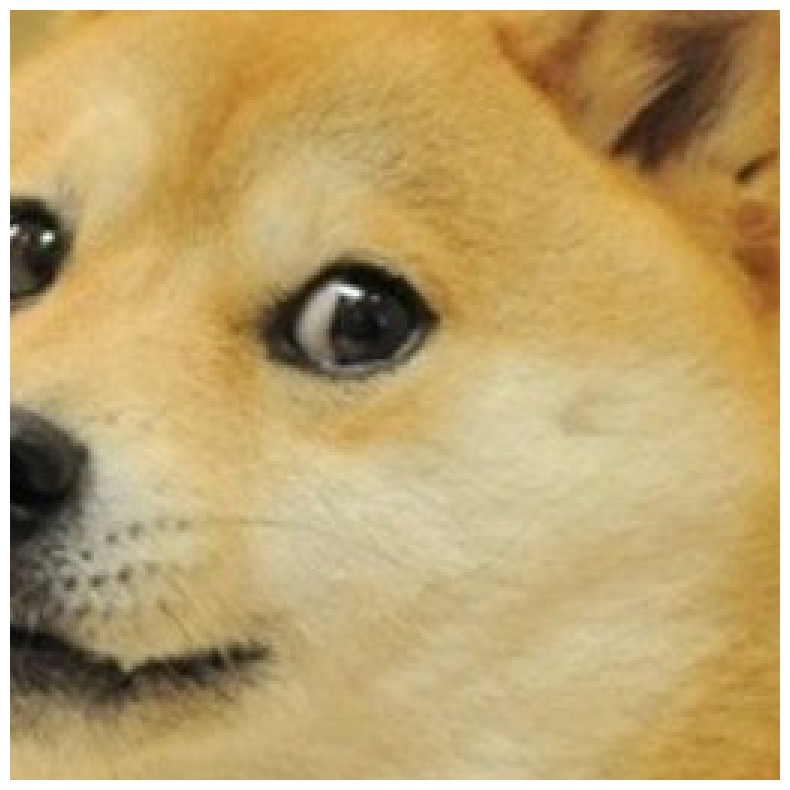

In [185]:
transformed = transform(image=image)
visualize(transformed["image"])

## Augmentation for Image with Bounding Boxes

## Step 1: Import albumentations and a library to read images from the disk (e.g., OpenCV)
We also create helper functions to visualize the images.

In [186]:
import cv2
from matplotlib import pyplot as plt

import albumentations as A


BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)



## Step 2: Define an augmentation pipeline
For an image with bounding boxes, we need to define the format for the bounding box coordinates in `bbox_params`. Albumentations supports 4 different formats: `pascal_voc`,`albumentations`, `coco`, and `yolo`. 

In [187]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5), 
     A.RandomCrop(width=256, height=256), 
     A.RandomBrightnessContrast(p=0.8)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

## Step 3: Read images from the disk.
We also show the bounding boxes using the `visualize` helper function.

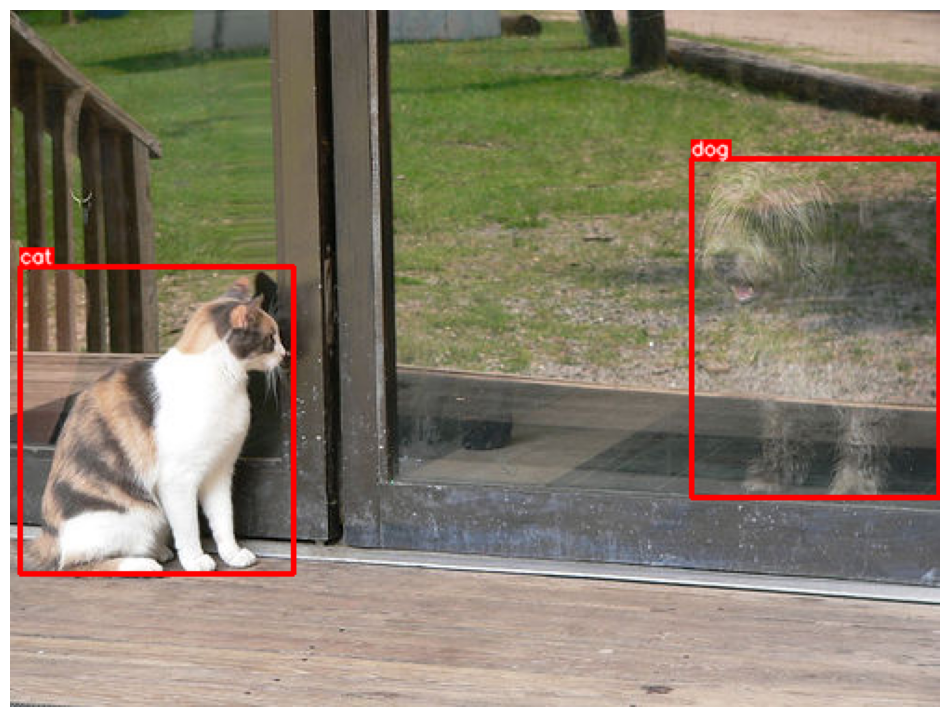

In [188]:
image = cv2.imread("dog-cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# define bounding boxes for the image. If the image is from a dataset for object detection, this is usually included.
bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
category_ids = [1, 2]
category_id_to_name = {1: 'cat', 2: 'dog'}

visualize(image, bboxes, category_ids, category_id_to_name)

## Step 4: Pass images to the augmentation pipeline and receive augmented images

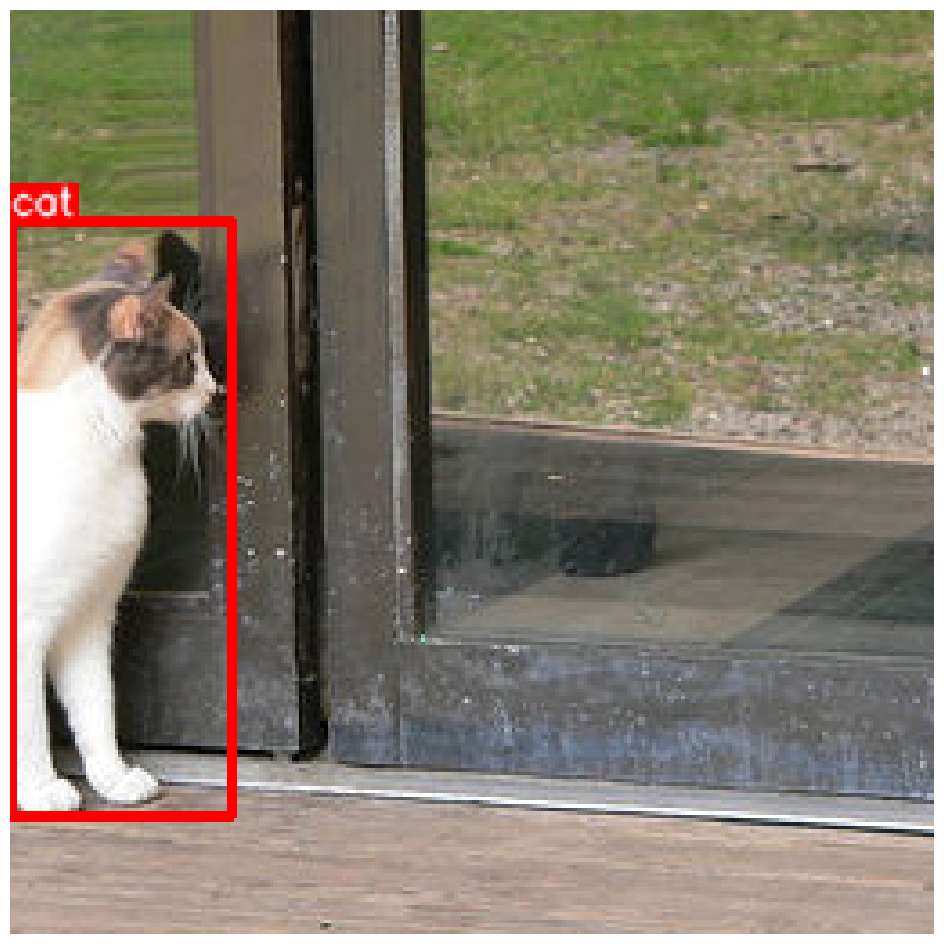

In [192]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# Thank you!

References: https://albumentations.ai/docs/
